# Колике су разлике еколошког отиска међу регионима?
До сада смо анализирали укупни еколошки отисак, еколошки дефицит и еколошке резерве држава користећи просечан ниво прихода као критеријум за груписање. У наредних неколико примера бавићемо се поређењем држава са различитих континената. То значи да ћемо користити варијаблу *Region* као групишућу, односно категоријалну. 

Као и до сада, учитавамо кориговане податке које смо припремили у првој лекцији.

In [1]:
import pandas as pd

otisak = pd.read_csv('podaci/NFA 2021 v2.csv')

Ради лакше манипулације легендама и називима графикона које ћемо исцртавати, одмах ћемо заменити називе региона терминима на српском језику.

In [2]:
# Променићемо називе региона у самом скупу и објединити категорије 'EU-28' и 'Other Europe'
# За ове потребе користимо Пајтон објекат dictionary (речник)
otisak.replace({'EU-28': 'Европа', 
                     'Other Europe': 'Европа',
                     'Africa': 'Африка',
                     'Asia-Pacific': 'Азија-Пацифик',
                     'North America': 'Северна Америка',
                     'South America': 'Јужна Америка',
                     'Middle East/Central Asia': 'Блиски исток и Централна Азија',
                     'Central America/Caribbean': 'Централна Америка'
                    }, inplace=True) # Промене обављамо директно у скупу otisak (inplace=True)

Вредности варијабле *Total Ecological Footprint* груписаћемо по регионима и упоредићемо дистрибуције помоћу кутијастог дијаграма. Обратите пажњу на разлике између аритметичких средина које су приказане кружићима и медијане дистрибуција приказане линијама унутар кутије. Такође обратите пажњу на облике дистрибуција поредећи дужине левог и десног „брка“ кутијастог дијаграма. На крају, звездицама су означени аберантни резултати или аутлајери. Постоје различити критеријуми за „проглашавање“ неког резултата аутлајером, али обично се користе они које је предложио __[*Džon Tuki*](https://en.wikipedia.org/wiki/Outlier#Tukey's_fences)__ (енгл. *John Tukey*), амерички статистичар који је и осмислио кутијасти дијаграм. 

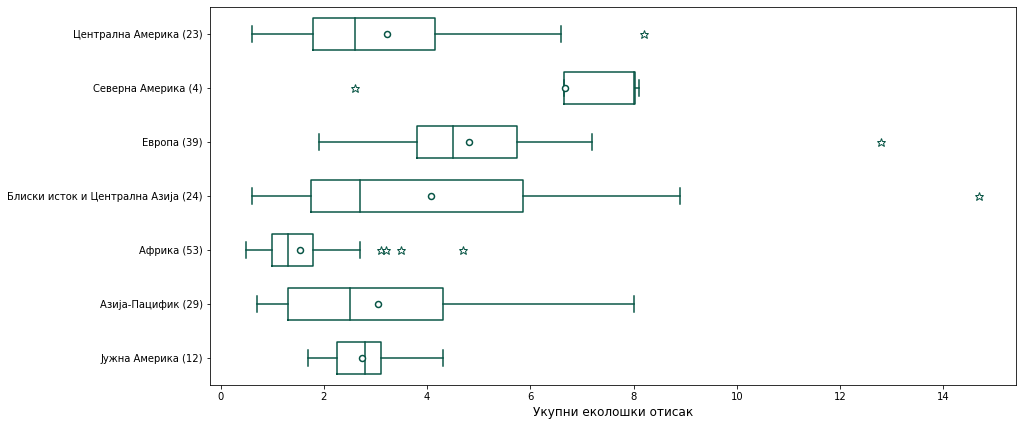

In [3]:
import matplotlib.pyplot as plt

# Правимо копију скупа коју ћемо на крају обрисати
otisakBox = otisak[['Region', 'Total Ecological Footprint']].copy() 

# Овде дефинишемо изглед линија,
forLin = dict(linestyle='-', linewidth=1.5, color='#085545')

# овде изглед аутлајера,
forMar = dict(marker='*', markerfacecolor='white', markeredgecolor='#085545', markersize=9, markeredgewidth=1)

# а овде аритметичке средине
forAS = dict(marker='o', markerfacecolor='white', markeredgecolor='#085545', markersize=6, markeredgewidth=1.5)

# Припрема графикона
boks = otisakBox.sort_values('Region').boxplot(figsize=[14,7], column='Total Ecological Footprint', by='Region',
               vert=False, grid=False, flierprops=forMar, meanprops=forAS, 
               whiskerprops=forLin, capprops=forLin, boxprops=forLin, widths=0.6,
               medianprops=forLin, showmeans=True, showfliers=True # fliers су аутлајери
              ) 

plt.xlabel('Укупни еколошки отисак', fontsize=12)
plt.suptitle('')
plt.title('')

# У наредних неколико редова ћемо уз називе региона на y-оси дописати број држава које их чине
brDrz = otisakBox.sort_values('Region').groupby('Region').count().reset_index()
regioni = boks.axes.get_yticklabels()
for reg in regioni:
    ime = reg.get_text()
    reg.set_text(ime + ' (' + str(brDrz[brDrz['Region']==ime].iloc[0]['Total Ecological Footprint']) + ')')
boks.axes.set_yticklabels(regioni)

# На крају приказујемо графикон
plt.show()

Најпре уочавамо да је варијабилност еколошког отиска међу државама и међу континентима веома велика. Код већине дистрибуција дужина десног „брка“ и положај медијане која је мања од аритметичке средине говори нам да су дистрибуције позитивно искошене, тј. да су одступања од типичних вредности већа у њеном десном делу. Иако поређења региона нису потпуно оправдана због великих разлика међу државама унутар истог региона, може се уочити да највећи еколошки отисак имају државе Северне Америке, а најмањи афричке државе. Помало чудан облик кутијастог дијаграма у случају Северне Америке последица је тога што су у ову категорију сврстане само четири државе. Највећу варијабилност унутар једног региона показују државе Блиског истока и Централне Азије.     

У одељку о јавном здрављу детаљније смо објаснили логику кутијастог дијаграма тако што смо га исцртали заједно са хистограмом. Учинићемо то и овде како бисмо још једном објаснили шта је представљено кутијом, а шта „брчићима“. Употребићемо библиотеку `seaborn` и варијаблу *Total Ecological Footprint*.

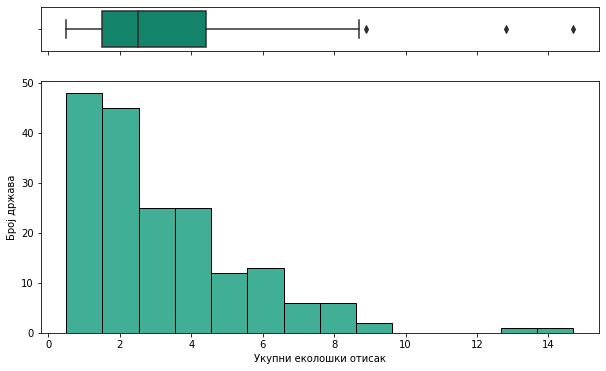

In [4]:
# Увозимо библиотеку seaborn
import seaborn as sbrn

# Креирамо објекат figure (мрежу) са две осе ("кућице") (ax_box и ax_hist)
# "Кућице" ће делити x-осу (sahrex=True), а висине ће им бити у односу 20% : 80%
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={'height_ratios': (0.15, 0.85)})
 
# У горњој "кућици" приказаћемо кутијасти дијаграм
sbrn.boxplot(data=otisakBox['Total Ecological Footprint'], orient="h", ax=ax_box, color='#019573')
# а у доњој хистограм за исту варијаблу
sbrn.histplot(data=otisakBox['Total Ecological Footprint'], ax=ax_hist, color='#019573')
 
# Уклањамо име и подеоке y-осе кутијастог дијаграма
ax_box.set(xlabel='', yticklabels='')

# Дајемо име x-оси
ax_hist.set(xlabel='Укупни еколошки отисак', ylabel='Број држава')

plt.show()

Уочите да на основу оба графикона можете да закључите да је дистрибуција искошена удесно на основу дужине десног „брчића“ и висине стубића у десном делу хистограма. Такође се лако уочавају и аутлајери у виду изолованих стубића на хистограму, односно ромбића на кутијастом дијаграму. Око половине држава групише се у интервалу вредности од приближно 1,5 до приближно 4.  

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Промените вредност параметра <b>showfliers</b> у <b>True</b> у коду којим смо исцртали расподеле по регионима и анализирајте како неприказивање аутлајера утиче на изглед и прегледност кутијастих дијаграма. Израчунајте варијабилност (стандардну девијацију) приказане варијабле по регионима.</div> 

У наредном примеру употребићемо библиотеку __[Plotly Express](https://plotly.com/python-api-reference/plotly.express.html#px)__ да бисмо приказали профиле региона с обзиром на висину различитих компоненти еколошког отиска коришћењем тзв. *радар* или *паук дијаграма*. Сâм назив графикона говори нам како он изгледа. У питању је круг издељен на онолико сегмената колико има варијабли. Свака варијабла је представљена линијом која полази из центра круга, а вредности варијабле су изражене удаљеношћу тачака од центра. Спајањем тачака добија се својеврстан профил ентитета (нпр. региона) на више варијабли. 

In [5]:
import plotly.express as px

stnd = False

# Правимо копију података тако што издвајамо колоне 6 до 14 из почетног скупа и бришемо две сувишне
otisakRadar = otisak.iloc[:,6:15].drop(columns=['Population (mil)', 'Income Group']).copy()

# Мењамо називе варијабли и рачунамо њихов просек за државе по регионима
otisakRadar.set_axis(['Region', 'Оранице', 'Пашњаци', 'Шуме', 'CO2', 'Риба', 'Земљиште'], axis=1, inplace=True)
otisakRadar = otisakRadar.groupby('Region').mean()

# На овом месту стандардизујемо вредости да бисмо их лакше упоредили
if stnd:
    for kol in range(0, 6): 
        otisakRadar[otisakRadar.columns[kol]] = otisakRadar[otisakRadar.columns[kol]] /  otisakRadar[otisakRadar.columns[kol]].max()

# Овде колоне табеле претварамо у редове тако да сваки регион добије онолико редова колико има варијабли
# Више информација о функцији stack() можете да пронађете на адреси https://pandas.pydata.org/docs/user_guide/reshaping.html
otisakRadar = otisakRadar.stack().reset_index()

# Мењамо називе колона 
otisakRadar = otisakRadar.rename(columns={otisakRadar.columns[1]: 'Tip', otisakRadar.columns[2]: 'Vrednost'})

# Исцртавамо поларни, паук или радар дијаграм
graf = px.line_polar(otisakRadar, r="Vrednost", theta="Tip", color="Region", line_close=True, width=700, height=400)
graf.update_layout(margin=dict(l=0, r=0, t=0, b=20), legend=dict(title='Регион', y=1.06, x=-0.3, bgcolor='rgba(0,0,0,0)'))
graf.update_traces(fill='toself', opacity=0.5)
graf.show()

del otisakRadar

У претходним анализама установили смо да је карбонски отисак најзначајнија компонента еколошког отиска. __[Карбонски отисак](https://www.overshootday.org/how-many-earths-or-countries-do-we-need/)__ представља укупну количину емитованих гасова стаклене баште и обично се изражава у килограмима или тонама еквивалентног CO<sub>2</sub> (CO<sub>2</sub>eq). У скупу отворених података који користимо, ове вредности су конвертоване у површину биолошки продуктивног земљишта потребну да се апсорбују емитовани гасови. Иако су јединице приказаних димензија еквивалентне (gha), велике разлике у распонима отежавају поређење. Стога ћемо вредности стандардизовати на веома једноставан начин – дељењем са максималном вредношћу у низу.

Промените вредност варијабле `stnd` у `True` и поново покрените горњи код. Сада се много лакше уочавају разлике међу регионима. Државе Азијско-Пацифичког региона највише се ослањају на морски потенцијал, док су у случају Јужне Америке то пашњаци. Као што смо видели и у претходној анализи, државе Северне Америке имају највећи еколошки отисак, а и релативно посматрано највећу емисију гасова стаклене баште и највеће потребе за биокапацитетима типа ораница и шума.

На крају ове лекције поново ћемо се позабавити еколошким отиском у контексту богатства нација, тачније општег благостања становника. Овога пута ћемо анализирати повезаност еколошких резерви и индекса хуманог развоја (ИХР) државa. Најпре ћемо дефинисати скуп података на коме радимо и израчунаћемо корелације варијабли *HDI* и *Ecological Deficit or Reserve*.

In [8]:
# Прво нацртајте графикон са овим поставкама, а потпом направите измене:
# 1. Други параметар у between(-100, 100) промените у 40
# 2. Уклоните # испред другог реда да би се узео у обзир услов квалитета података 3А
# 3. Услов otisak['HDI']>-1 промените у otisak['HDI']>0 да би се искључиле државе без податка о HDI
otisakSkater = otisak[(otisak['Ecological Deficit or Reserve'].between(-100, 100)) &  
                      #(otisak['Data Quality']=='3A') &                             
                      (otisak['HDI']>-1)
                     ].copy()                                     

# Правимо корелациону матрицу од варијабли HDI и Ecological Deficit or Reserve
korMat = otisakSkater[['HDI', 'Ecological Deficit or Reserve']].corr(method='spearman').round(2)
korMat

,HDI,Ecological Deficit or Reserve
HDI,1.00,-0.34
Ecological Deficit or Reserve,-0.34,1.00


У дијагоналним ћелијама матрице су јединице јер је свака варијабла у максималној корелацији сама са собом. У ћелијама [0,1] и [1,0] су исте вредности корелација. Корелације су негативне, што значи да државе које имају виши индекс хуманог развоја генерално имају ниже вредности варијабле *Ecological Deficit or Reserve*, односно већи еколошки дефицит.

<div class="alert alert-block alert-success"><img src="slike/recnik.png" align="left"/>Искористите речник на крају курса да бисте се подсетили појмова корелације и корелационе матрице. Можда ће вам бити лакше да их разумете на примеру школских оцена.</div> 

Сада ћемо употребити дијаграм распршења на коме су државе приказане кружићима у дводимензионалном простору варијабли *HDI* и *Ecological Deficit or Reserve*. Кружићи су обојени у складу са регионом којем припадају, што је приказано у легенди. Да бисте видели називе држава пређите показивачем миша преко кружића.

In [7]:
# Узимамо корелацију из ћелије [0,1] корелационе матрице да бисмо је исписали у називу графикона 
kor = korMat.iloc[0,1].round(2)

# Исцртавамо скатер дијаграм користећи дискретну палету боја px.colors.qualitative.Set2 
graf = px.scatter(otisakSkater, x='HDI', y='Ecological Deficit or Reserve', template='plotly_white',
                  width=900, height=600, hover_data=['Country'], color='Region', color_discrete_sequence=px.colors.qualitative.Set2
                 )

# Мало уређујемо изглед маркера
graf.update_traces(marker=dict(size=8, line=dict(width=1, color='darkgreen')), selector=dict(mode='markers'))

# Смањујемо маргине и подешавамо наслове графиконa и легенде 
graf.update_layout(margin=dict(l=80, r=0, t=60, b=60), 
                   xaxis_title='Индекс хуманог развоја', yaxis_title='Еколошки дефицит или резерва',
                   legend=dict(title='Регион', y=1, x=1.02, bgcolor='rgba(0,0,0,0)'),
                   title=dict(text='Повезаност ИХР и еколошких резерви по регионима (r = ' + str(kor) + ')'), 
                   title_xanchor='center', title_x=0.5
                  )

# Гранична линија за баланс отиска и биокапацитета (0)
graf.add_hline(y=0, line_width=1, line_dash='dot', line_color='darkgreen')
# Гранична линија за висок индекс хуманог развоја (0)
graf.add_vline(x=0.7, line_width=1, line_dash='dot', line_color='darkgreen')

graf.show()

del otisakSkater

Прва ствар коју уочавамо на графикону су атипични и аберантни резултати који умногоме нарушавају изглед графикона. Три државе са севера Јужне Америке из групе тзв. Гвајана (Гвајана, Француска Гвајана и Суринам) издвајају се по екстремно високим вредностима еколошких резерви. Њих карактерише релативно велика површина и мали број становника. Са друге стране, неколико држава има нулте вредности ИХР, што може да се припише лошем квалитету података. И поред тога, корелација две варијабле је умерена и негативна, што показује да државе у којима влада веће благостање генерално имају мање еколошке резерве, односно већи еколошки дефицит.

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Направите промене услова за укључивање држава како је назначено у претпрошлој ћелији и поново покрените код у претходне две ћелије да бисте исцртали нови графикон.</div> 

Као што видите, корелација је сада још већа (по апсолутној вредности), а графикон је прегледнији. Корелација је негативна првенствено зато што је велики број тачака груписан у доњем десном квадранту графикона. То су државе које имају висок индекс хуманог развоја и ниске резерве природних ресурса, односно велики еколошки дефицит. Ипак, и даље треба имати на уму да се варијабилност еколошког дефицита драстично разликује између држава високог и ниског ИХР. Према препорукама Уједињених нација (__[UNDP](https://en.wikipedia.org/wiki/Human_Development_Index)__), та граница је постављена на вредност 0,7. Хоризонтална линија означава равнотежу између расположивих биокапацитета и потреба државе за њима. И овом анализом смо потврдили претходне резултате који говоре у прилог повезаности богатства државе, тачније благостања њених становника, и потреба за биолошким ресурсима. Негативна корелација указује на то да државе са већим ИХР имају мање еколошке резерве, односно већи еколошки дефицит. Тај дефицит је посебно висок код неких европских држава и држава Блиског истока. Са друге стране, већину афричких држава карактерише низак БДП и низак еколошки дефицит.

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Које државе са високим индексом хуманог развоја бисте навели као позитивне примере односа према природној средини и биопотенцијалима, а које као негативне и лоше. Какав је тај однос с обзиром на регионе?</div> 

**Колике су разлике еколошког отиска међу регионима?**

Иако постоје велике разлике чак и међу државама истог региона, видљиво је да је еколошки отисак најмањи у групи афричких држава. Међутим, ове државе уједно имају и ниску стопу индекса хуманог развоја. Највећи еколошки дефицит имају државе Блиског истока чија се економија базира на производњи нафте и које немају других природних богатстава, нити довољно биокапацитета да компензују тако велику потрошњу. 